# 셀프 주유소는 정말 저렴할까

## 1. Selenium 사용하기

In [1]:
#-*- encoding:utf8 -*-

In [3]:
from selenium import webdriver

In [4]:
driver = webdriver.Chrome('c:/driver/chromedriver')
driver.get("http://naver.com")

In [5]:
driver.close()

## 2. 서울시 구별 주유소 가격 정보 얻기

In [57]:
driver = webdriver.Chrome('c:/driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [58]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [9]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [10]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [11]:
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [12]:
xpath = """//*[@id="glopopd_excel"]"""
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [14]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [15]:
driver.close()

## 3. 구별 주유 가격에 대한 데이터의 정리

In [16]:
import pandas as pd
from glob import glob

In [18]:
#glob('data/지역_위치별*xls')
stations_files = glob('data/*xls')
stations_files

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls',
 'data\\지역_위치별(주유소) (14).xls',
 'data\\지역_위치별(주유소) (15).xls',
 'data\\지역_위치별(주유소) (16).xls',
 'data\\지역_위치별(주유소) (17).xls',
 'data\\지역_위치별(주유소) (18).xls',
 'data\\지역_위치별(주유소) (19).xls',
 'data\\지역_위치별(주유소) (2).xls',
 'data\\지역_위치별(주유소) (20).xls',
 'data\\지역_위치별(주유소) (21).xls',
 'data\\지역_위치별(주유소) (22).xls',
 'data\\지역_위치별(주유소) (23).xls',
 'data\\지역_위치별(주유소) (24).xls',
 'data\\지역_위치별(주유소) (25).xls',
 'data\\지역_위치별(주유소) (3).xls',
 'data\\지역_위치별(주유소) (4).xls',
 'data\\지역_위치별(주유소) (5).xls',
 'data\\지역_위치별(주유소) (6).xls',
 'data\\지역_위치별(주유소) (7).xls',
 'data\\지역_위치별(주유소) (8).xls',
 'data\\지역_위치별(주유소) (9).xls',
 'data\\지역_위치별(주유소).xls']

In [19]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [20]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 41
Data columns (total 10 columns):
지역       555 non-null object
상호       555 non-null object
주소       555 non-null object
상표       555 non-null object
전화번호     555 non-null object
셀프여부     555 non-null object
고급휘발유    555 non-null object
휘발유      555 non-null object
경유       555 non-null object
실내등유     555 non-null object
dtypes: object(10)
memory usage: 47.7+ KB


In [21]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1485,1344,-
1,서울특별시,현대오일뱅크 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1688,1486,1386,-
2,서울특별시,지에스타워주유소,서울특별시 강남구 논현로 516 (역삼동),GS칼텍스,02-539-5145,N,1695,1495,1375,-
3,서울특별시,에쓰-오일(주)직영개나리주유소,서울특별시 강남구 언주로 423 (역삼동),S-OIL,02-564-0187,N,1695,1495,1375,-
4,서울특별시,(주)동하힐탑셀프주유소,서울 강남구 논현로 640 (논현동),SK에너지,02-544-4075,Y,1673,1497,1377,-


In [22]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1485,Y,SK에너지
1,현대오일뱅크 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡2동),1486,Y,현대오일뱅크
2,지에스타워주유소,서울특별시 강남구 논현로 516 (역삼동),1495,N,GS칼텍스
3,에쓰-오일(주)직영개나리주유소,서울특별시 강남구 언주로 423 (역삼동),1495,N,S-OIL
4,(주)동하힐탑셀프주유소,서울 강남구 논현로 640 (논현동),1497,Y,SK에너지


In [23]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1485,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡2동),1486,Y,현대오일뱅크,강남구
2,지에스타워주유소,서울특별시 강남구 논현로 516 (역삼동),1495,N,GS칼텍스,강남구
3,에쓰-오일(주)직영개나리주유소,서울특별시 강남구 언주로 423 (역삼동),1495,N,S-OIL,강남구
4,(주)동하힐탑셀프주유소,서울 강남구 논현로 640 (논현동),1497,Y,SK에너지,강남구


In [24]:
stations['구'].unique()

array(['강남구', '도봉구', '특별시', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '서울특별시', '성북구', '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구',
       '중구', '중랑구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'],
      dtype=object)

In [25]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구
11,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),1559,N,SK에너지,서울특별시


In [26]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강남구', '도봉구', '특별시', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '성북구', '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'],
      dtype=object)

In [27]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구
8,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1395,Y,S-OIL,특별시


In [28]:
stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [29]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
13,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
25,현대주유소,서울 양천구 남부순환로 372 (신월동),-,Y,S-OIL,양천구
32,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
33,대지주유소,서울 영등포구 영등포로 115 (당산동2가),-,N,SK에너지,영등포구
17,대성산업(주)대성주유소,서울 은평구 통일로 642 (녹번동),-,N,GS칼텍스,은평구
21,현대오일뱅크(주)직영신구로주유소,서울특별시 구로구 가마산로 293 (구로동),-,N,현대오일뱅크,구로구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [30]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1485,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡2동),1486,Y,현대오일뱅크,강남구
2,지에스타워주유소,서울특별시 강남구 논현로 516 (역삼동),1495,N,GS칼텍스,강남구
3,에쓰-오일(주)직영개나리주유소,서울특별시 강남구 언주로 423 (역삼동),1495,N,S-OIL,강남구
4,(주)동하힐탑셀프주유소,서울 강남구 논현로 640 (논현동),1497,Y,SK에너지,강남구


In [31]:
stations['가격'] = [float(value) for value in stations['가격']]

In [32]:
stations.reset_index(inplace=True)
del stations['index']

In [33]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 6 columns):
Oil_store    547 non-null object
주소           547 non-null object
가격           547 non-null float64
셀프           547 non-null object
상표           547 non-null object
구            547 non-null object
dtypes: float64(1), object(5)
memory usage: 25.7+ KB


In [34]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1485.0,Y,SK에너지,강남구
1,현대오일뱅크 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡2동),1486.0,Y,현대오일뱅크,강남구
2,지에스타워주유소,서울특별시 강남구 논현로 516 (역삼동),1495.0,N,GS칼텍스,강남구
3,에쓰-오일(주)직영개나리주유소,서울특별시 강남구 언주로 423 (역삼동),1495.0,N,S-OIL,강남구
4,(주)동하힐탑셀프주유소,서울 강남구 논현로 640 (논현동),1497.0,Y,SK에너지,강남구


## 4. 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

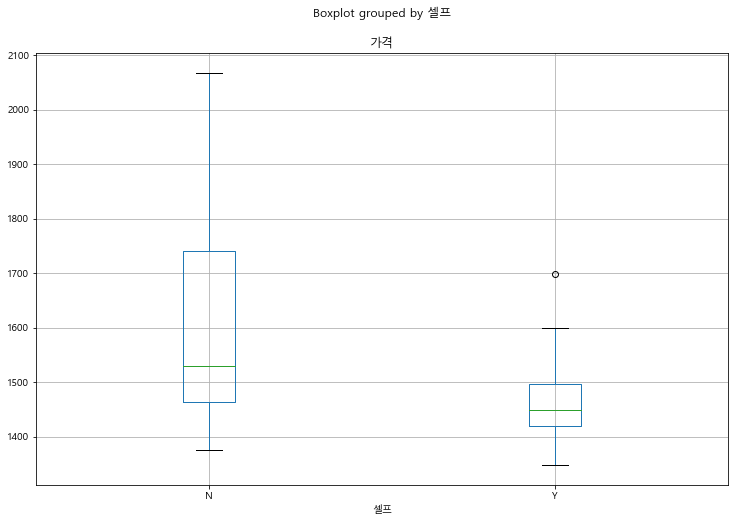

In [43]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

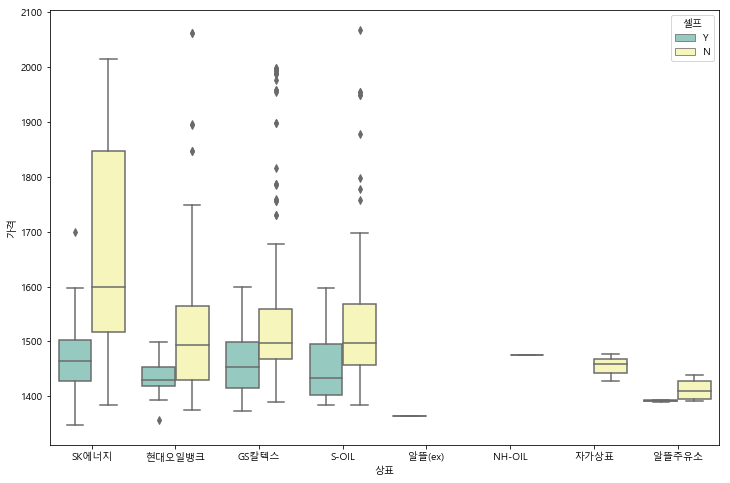

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

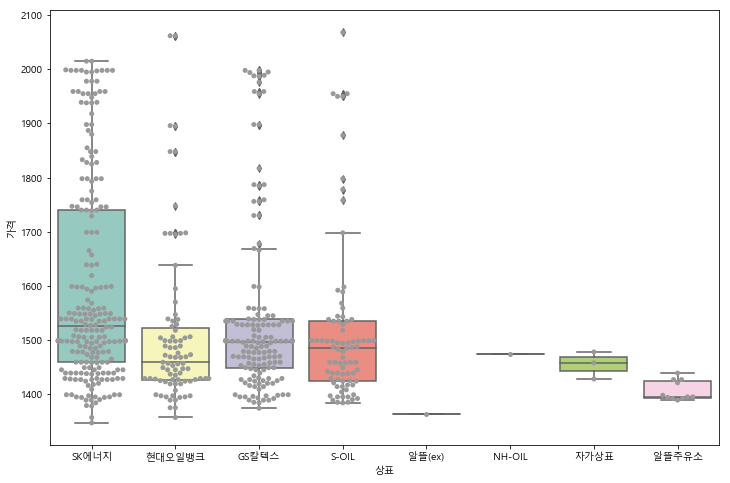

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

In [47]:
!pip install folium

In [48]:
!pip install googlemaps

  Running setup.py bdist_wheel for googlemaps: started
  Running setup.py bdist_wheel for googlemaps: finished with status 'done'
  Stored in directory: C:\Users\Playdata\AppData\Local\pip\Cache\wheels\3c\3f\25\ce6d7722dba07e5d4a12d27ab38f3d7add65ef43171b02c819
Successfully built googlemaps


## 5.서울시 구별 주유 가격 확인하기

In [49]:
import json
import folium
import googlemaps
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [50]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
199,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2068.0,N,S-OIL,성북구
546,현대오일뱅크(주)직영 한양주유소,서울 강남구 압구정로 302 (신사동),2062.0,N,현대오일뱅크,강남구
40,현대오일뱅크(주)직영 한양주유소,서울 강남구 압구정로 302 (신사동),2062.0,N,현대오일뱅크,강남구
545,뉴서울(강남),서울 강남구 언주로 716 (논현동),2015.0,N,SK에너지,강남구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2015.0,N,SK에너지,강남구
357,서남주유소,서울 중구 통일로 30 (봉래동1가),1999.0,N,SK에너지,중구
317,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
355,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),1998.0,N,SK에너지,중구
344,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),1998.0,N,SK에너지,종로구
316,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구


In [51]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
387,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1347.0,Y,SK에너지,강서구
320,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1357.0,Y,현대오일뱅크,은평구
321,타이거주유소,서울 은평구 수색로 188 (증산동),1357.0,Y,SK에너지,은평구
121,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1364.0,Y,알뜰(ex),서초구
374,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1374.0,Y,GS칼텍스,강북구
41,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1375.0,N,현대오일뱅크,도봉구
42,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1375.0,N,현대오일뱅크,도봉구
322,무궁화주유소,서울특별시 은평구 응암로 163 (응암동),1378.0,Y,SK에너지,은평구
43,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1379.0,Y,SK에너지,도봉구
457,극동유화(주)항동주유소,서울특별시 구로구 서해안로 2154 (항동),1384.0,Y,S-OIL,구로구


In [53]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1682.000000
강동구,1577.388889
강북구,1436.923077
강서구,1463.411765
관악구,1503.000000


In [54]:
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

## 6 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [55]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
199,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2068.0,N,S-OIL,성북구
546,현대오일뱅크(주)직영 한양주유소,서울 강남구 압구정로 302 (신사동),2062.0,N,현대오일뱅크,강남구
40,현대오일뱅크(주)직영 한양주유소,서울 강남구 압구정로 302 (신사동),2062.0,N,현대오일뱅크,강남구
545,뉴서울(강남),서울 강남구 언주로 716 (논현동),2015.0,N,SK에너지,강남구
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2015.0,N,SK에너지,강남구
357,서남주유소,서울 중구 통일로 30 (봉래동1가),1999.0,N,SK에너지,중구
317,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
355,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),1998.0,N,SK에너지,중구
344,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),1998.0,N,SK에너지,종로구
316,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구


In [56]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
387,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1347.0,Y,SK에너지,강서구
320,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1357.0,Y,현대오일뱅크,은평구
321,타이거주유소,서울 은평구 수색로 188 (증산동),1357.0,Y,SK에너지,은평구
121,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1364.0,Y,알뜰(ex),서초구
374,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1374.0,Y,GS칼텍스,강북구
41,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1375.0,N,현대오일뱅크,도봉구
42,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1375.0,N,현대오일뱅크,도봉구
322,무궁화주유소,서울특별시 은평구 응암로 163 (응암동),1378.0,Y,SK에너지,은평구
43,삼미북부셀프주유소,서울특별시 도봉구 도봉로 437 (쌍문동),1379.0,Y,SK에너지,도봉구
457,극동유화(주)항동주유소,서울특별시 구로구 서해안로 2154 (항동),1384.0,Y,S-OIL,구로구


In [197]:
gmap_key = "---개인 google api 사용 key " # key를 입력
gmaps = googlemaps.Client(key=gmap_key)

In [201]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !



,Oil_store,주소,가격,셀프,상표,구,lat,lng
199,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2068.0,N,S-OIL,성북구,NaN,NaN
546,현대오일뱅크(주)직영 한양주유소,서울 강남구 압구정로 302 (신사동),2062.0,N,현대오일뱅크,강남구,NaN,NaN
40,현대오일뱅크(주)직영 한양주유소,서울 강남구 압구정로 302 (신사동),2062.0,N,현대오일뱅크,강남구,NaN,NaN
39,뉴서울(강남),서울 강남구 언주로 716 (논현동),2015.0,N,SK에너지,강남구,NaN,NaN
545,뉴서울(강남),서울 강남구 언주로 716 (논현동),2015.0,N,SK에너지,강남구,NaN,NaN
357,서남주유소,서울 중구 통일로 30 (봉래동1가),1999.0,N,SK에너지,중구,NaN,NaN
344,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구,NaN,NaN
356,주)중앙에너비스 퇴계로지점,서울특별시 중구 퇴계로 228 (필동2가),1998.0,N,SK에너지,중구,NaN,NaN
345,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),1998.0,N,SK에너지,종로구,NaN,NaN
355,장충주유소,서울 중구 장충단로 202 (장충동1가),1998.0,N,SK에너지,중구,NaN,NaN


In [202]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !
Here is nan !



,Oil_store,주소,가격,셀프,상표,구,lat,lng
387,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1347.0,Y,SK에너지,강서구,NaN,NaN
320,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1357.0,Y,현대오일뱅크,은평구,NaN,NaN
321,타이거주유소,서울 은평구 수색로 188 (증산동),1357.0,Y,SK에너지,은평구,NaN,NaN
374,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1374.0,Y,GS칼텍스,강북구,NaN,NaN
42,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1375.0,N,현대오일뱅크,도봉구,NaN,NaN
41,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1375.0,N,현대오일뱅크,도봉구,NaN,NaN
322,무궁화주유소,서울특별시 은평구 응암로 163 (응암동),1378.0,Y,SK에너지,은평구,NaN,NaN
121,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1384.0,Y,알뜰(ex),서초구,NaN,NaN
457,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1384.0,N,SK에너지,구로구,NaN,NaN
458,극동유화(주)항동주유소,서울특별시 구로구 서해안로 2154 (항동),1384.0,Y,S-OIL,구로구,NaN,NaN


In [185]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map